In [1]:
##ANALYSIS
#1.Confirmed: Temperature rises as one approaches the equator.  
#2.No observable correlation between cloudiness and latitude. However, humidity seems rather high today across the globe.
#3. No observable correlation between wind speed and latitude.

In [2]:
### Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#Graphing
import seaborn as sns
#Scalable Rate Limiting Algorithm: Pip installed ratelimiter
#Limits how often user can call API/period
from ratelimiter import RateLimiter

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
#Pip installed citipy
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#API URL + Units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#Create dataframe to house randomly generated lat & long values
df_alllatlong = pd.DataFrame({
    "lat":lats,
    "long":lngs})        
df_alllatlong.head()

,lat,long
0,-42.870530,-55.953830
1,1.930007,116.816490
2,85.502508,-146.222145
3,-18.052393,-34.753172
4,26.556525,-136.831157


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#I want a dataframe of just the cities
cities_df = pd.DataFrame({"cities":cities})
#Drop duplicates and NaNs from cities so there is a unique, fully populated series
cities_df_uniq = cities_df.dropna()
cities_df_uniq = cities_df_uniq.drop_duplicates()
#cities_df_uniq.head()
len(cities_df_uniq)

620

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Lists to hold variables for weather elements
cityname=[]
cloud=[]
countryname=[]
date=[]
humidity=[]
lats=[]
lngs=[]
maxtemp=[]
windspeed=[]
#API Key protection - limits API call 50x/60 period
rate_limiter = RateLimiter(max_calls=50, period=60)
print("Beginning Data Retrieval\n----------------------------------\n")
#Loop to grab pertinent data
for index,rows in cities_df_uniq.iterrows():
     with rate_limiter:
            query = f'{url}appid={api_key}&units={units}&q={rows["cities"]}'
            print(f'Processing Record {index+1} | {rows["cities"]}')
            print(query)
            current_weather_citiesj = requests.get(query).json()
            try:
                cityname.append(current_weather_citiesj["name"])
                cloud.append(current_weather_citiesj["clouds"]["all"])
                countryname.append(current_weather_citiesj["sys"]["country"])
                date.append(current_weather_citiesj["dt"])
                humidity.append(current_weather_citiesj["main"]["humidity"])
                lats.append(current_weather_citiesj["coord"]["lat"])
                lngs.append(current_weather_citiesj["coord"]["lon"])
                maxtemp.append(current_weather_citiesj["main"]["temp"])
                windspeed.append(current_weather_citiesj["wind"]["speed"])
            except: 
                print (f'Data not found. Skipping...')
print("----------------------------------\nData Retrieval Complete\n----------------------------------")

Beginning Data Retrieval
----------------------------------

Processing Record 1 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=mar del plata
Processing Record 2 | tarakan
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=tarakan
Processing Record 3 | barrow
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=barrow
Processing Record 4 | caravelas
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=caravelas
Processing Record 5 | pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=pacific grove
Processing Record 6 | mandalgovi
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=mandalgovi
Processing Record 7 | ahipara
http://api.openweathermap.org/d

Processing Record 56 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=rikitea
Processing Record 57 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=lavrentiya
Processing Record 58 | cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=cherskiy
Processing Record 59 | barentsburg
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=barentsburg
Data not found. Skipping...
Processing Record 60 | kommunisticheskiy
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=kommunisticheskiy
Processing Record 61 | jieshi
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=jieshi
Processing Record 62 | mlowo
http://api.openweathermap.org/data/2.5/weather?appid=31f8

Processing Record 112 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=bluff
Processing Record 113 | pitimbu
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=pitimbu
Processing Record 114 | salalah
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=salalah
Processing Record 115 | valdivia
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=valdivia
Processing Record 116 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=atuona
Processing Record 117 | port hardy
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=port hardy
Processing Record 118 | upernavik
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=upe

Processing Record 169 | derzhavinsk
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=derzhavinsk
Processing Record 170 | yizheng
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=yizheng
Processing Record 171 | vaitupu
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=vaitupu
Data not found. Skipping...
Processing Record 172 | jumla
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=jumla
Processing Record 173 | san policarpo
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=san policarpo
Processing Record 174 | kununurra
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=kununurra
Processing Record 175 | boksitogorsk
http://api.openweathermap.org/data/2.5/weather?appid=31f8

Processing Record 224 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=nikolskoye
Processing Record 225 | carmaux
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=carmaux
Processing Record 226 | council bluffs
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=council bluffs
Processing Record 227 | medea
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=medea
Processing Record 228 | chuy
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=chuy
Processing Record 229 | balancan
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=balancan
Data not found. Skipping...
Processing Record 230 | tromso
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411

Processing Record 280 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=bambous virieux
Processing Record 281 | tecoanapa
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=tecoanapa
Processing Record 282 | waiouru
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=waiouru
Processing Record 283 | quincy
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=quincy
Processing Record 284 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=bandarbeyla
Processing Record 285 | progreso
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=progreso
Processing Record 286 | vila
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1

Processing Record 335 | kiama
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=kiama
Processing Record 336 | temaraia
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=temaraia
Data not found. Skipping...
Processing Record 337 | svetlyy
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=svetlyy
Data not found. Skipping...
Processing Record 338 | karratha
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=karratha
Processing Record 339 | tucuman
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=tucuman
Processing Record 340 | tabou
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=tabou
Processing Record 341 | zhuhai
http://api.openweathermap.org/data/2.5/weather?appid=31f880

Processing Record 392 | la ronge
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=la ronge
Processing Record 393 | chesterton
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=chesterton
Processing Record 394 | aitape
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=aitape
Processing Record 395 | karakendzha
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=karakendzha
Data not found. Skipping...
Processing Record 396 | tsihombe
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=tsihombe
Data not found. Skipping...
Processing Record 397 | karaul
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=karaul
Data not found. Skipping...
Processing Record 398 | tsogni
http://api.op

Processing Record 448 | mareeba
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=mareeba
Processing Record 449 | atlantis
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=atlantis
Processing Record 450 | rincon
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=rincon
Processing Record 451 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=saint-joseph
Processing Record 452 | henties bay
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=henties bay
Processing Record 453 | mukhen
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=mukhen
Processing Record 454 | borzya
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imp

Processing Record 505 | salekhard
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=salekhard
Processing Record 506 | altamira
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=altamira
Processing Record 507 | half moon bay
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=half moon bay
Processing Record 508 | samana
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=samana
Processing Record 509 | merta
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=merta
Processing Record 510 | boyolangu
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=boyolangu
Processing Record 511 | sigerfjord
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units

Processing Record 561 | ugoofaaru
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=ugoofaaru
Processing Record 562 | bumba
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=bumba
Processing Record 563 | bernardino de campos
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=bernardino de campos
Processing Record 564 | dupnica
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=dupnica
Data not found. Skipping...
Processing Record 565 | paamiut
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=paamiut
Processing Record 566 | loa janan
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=loa janan
Processing Record 567 | cefalu
http://api.openweathermap.org/data/2.5/weather?appid=

Processing Record 617 | moindou
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=moindou
Processing Record 618 | shubarshi
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=shubarshi
Processing Record 619 | la baule-escoublac
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=la baule-escoublac
Processing Record 620 | chaa-khol
http://api.openweathermap.org/data/2.5/weather?appid=31f8807b8daca1b411078b8423b535a1&units=imperial&q=chaa-khol
Data not found. Skipping...
----------------------------------
Data Retrieval Complete
----------------------------------


In [6]:
#Create dataframe, omitting empty values, and push to output csv
cities_df_uniq = cities_df_uniq.dropna()
full_weather_df = pd.DataFrame({
"City":cityname,"Cloudiness":cloud,
"Country":countryname,
"Date":date,
"Humidity":humidity,
"Latitude":lats,
"Longitude":lngs,
"Max Temp":maxtemp,
"Wind Speed":windspeed
})
full_weather_df.to_csv("full_weather.csv")
full_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Mar del Plata,88,AR,1545361157,36,-46.43,-67.52,73.82,8.90
1,Tarakan,40,ID,1545357600,83,3.30,117.63,82.40,2.24
2,Barrow,92,AR,1545361222,99,-38.31,-60.23,62.84,4.25
3,Caravelas,0,BR,1545361607,100,-17.73,-39.27,79.85,19.42
4,Pacific Grove,1,US,1545360900,83,36.62,-121.92,53.65,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [7]:
#variable for today's date (taken from first Date series value)
datenow = pd.to_datetime('1545356876', unit='s')
datenow2 = datenow.strftime("%m/%d/%y")

#### Latitude vs. Temperature Plot

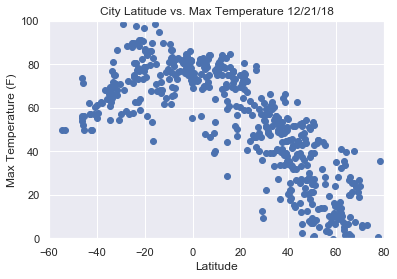

In [8]:
sns.set()
plt.scatter(full_weather_df["Latitude"],full_weather_df["Max Temp"])
plt.xlim(-60,80)
plt.ylim(0,100)
plt.title(f'City Latitude vs. Max Temperature {datenow2}')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
#visible grid
plt.savefig("1City_Lat_Max_Temp_Scatterplot.png")
plt.show()

#### Latitude vs. Humidity Plot

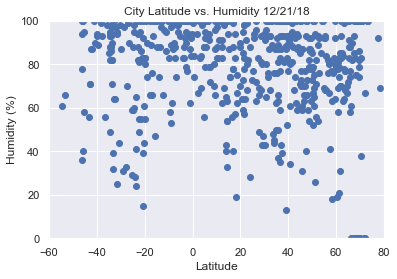

In [9]:
plt.scatter(full_weather_df["Latitude"],full_weather_df["Humidity"])
plt.xlim(-60,80)
plt.ylim(0,100)
plt.title(f'City Latitude vs. Humidity {datenow2}')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
#visible grid
plt.savefig("2City_Lat_Humidity_Scatterplot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

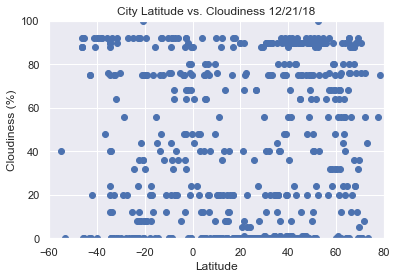

In [10]:
plt.scatter(full_weather_df["Latitude"],full_weather_df["Cloudiness"])
plt.xlim(-60,80)
plt.ylim(0,100)
plt.title(f'City Latitude vs. Cloudiness {datenow2}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
#visible grid
plt.savefig("3City_Lat_Cloudiness_Scatterplot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

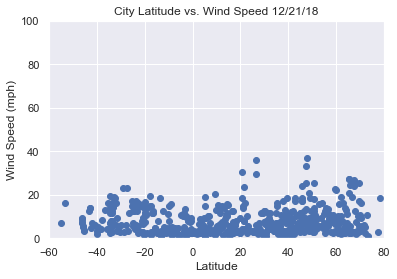

In [11]:
plt.scatter(full_weather_df["Latitude"],full_weather_df["Wind Speed"])
plt.xlim(-60,80)
plt.ylim(0,100)
plt.title(f'City Latitude vs. Wind Speed {datenow2}')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
#visible grid
plt.savefig("4City_Lat_Wind_Speed_Scatterplot.png")
plt.show()